# 4.10 Coding Etiquette & Excel Reporting Milena Nedyalkova

1. Importing libraries
2. PII Risks
3. Regional Segmentation
4. Low activity customers
5. Visualizations

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path_data = r'C:\Users\PC\Desktop\CareerFoundry Data Analytics\08-2025 Instacart Basket Analysis'

In [2]:
# Import the set, created in the last exercise 
df = pd.read_pickle(os.path.join(path_data, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

In [3]:
# Check the data frame 
df.shape

(32404859, 31)

In [4]:
df.head()

C:\Users\PC\anaconda3\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\PC\anaconda3\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df.dtypes

order_id                        int32
user_id                         int32
order_number                     int8
orders_day_of_week               int8
order_hour_of_day                int8
days_since_prior_order        float16
product_id                      int32
add_to_cart_order               int32
reordered                        int8
product_name                   object
aisle_id                        int64
department_id                   int64
prices                        float64
busiest_day                    object
how_busy                       object
busiest_period_of_day          object
max_order                        int8
loyalty_flag                   object
avg_product_price             float64
spending_flag                  object
median_days_between_orders    float16
order_frequency_flag           object
First Name                     object
Last Name                      object
Gender                         object
State                          object
Age         

In [6]:
# Creating a smaller dataframe, dropping some of the columns, that are not relevant for the visualization
df_vis = df.drop(['orders_day_of_week', 'order_hour_of_day', 'reordered', 'First Name', 'Last Name', 'Date Joined', 'product_name', 'median_days_between_orders','aisle_id', 'department_id'], axis=1)

In [7]:
# Check the size of the new data frame
df_vis.shape

(32404859, 21)

In [8]:
# Exporting the new df 
df_vis.to_pickle(os.path.join(path_data, '02 Data','Prepared Data', 'ords_prods_customers_4_10.pkl'))

## PII Risks

This dataframe contains GDPR-sensitive information (a name in combination with a state would generally still count as personal data under GDPR). Thats why the data will only be used for analysis purposes and will not be published in detail to the public.

## Regional Segmentation

The regional segmentation in this data frame is based on the following source: 
https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [9]:
# Create a new column 'region', based on the state column
northeast = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", 
             "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania"]
midwest = ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", 
           "Iowa", "Kansas", "Minnesota", "Missouri", 
           "Nebraska", "North Dakota", "South Dakota"]
south = ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", 
         "Virginia", "District of Columbia", "West Virginia", "Alabama", "Kentucky", 
         "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas"]
west = ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", 
        "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington"]

In [10]:
#Assign states to region 
def region(state):
    if state in northeast:
        return "Northeast"
    elif state in midwest:
        return "Midwest"
    elif state in south:
        return "South"
    elif state in west:
        return "West"
    else:
        return "Unknown"

In [11]:
# Create the new column 'region'
df_vis["Region"] = df_vis["State"].apply(region)

In [12]:
# Check the new column
df_vis["Region"].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [13]:
df_vis.head()

C:\Users\PC\anaconda3\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\PC\anaconda3\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,order_id,user_id,order_number,days_since_prior_order,product_id,add_to_cart_order,prices,busiest_day,how_busy,busiest_period_of_day,...,avg_product_price,spending_flag,order_frequency_flag,Gender,State,Age,Number of Dependents,Family Status,Income,Region
0,2539329,1,1,NaN,196,1,9.0,Regularly busy,Regularly busy,Most orders,...,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South
1,2539329,1,1,NaN,14084,2,12.5,Regularly busy,Regularly busy,Most orders,...,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South
2,2539329,1,1,NaN,12427,3,4.4,Regularly busy,Regularly busy,Most orders,...,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South
3,2539329,1,1,NaN,26088,4,4.7,Regularly busy,Regularly busy,Most orders,...,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South
4,2539329,1,1,NaN,26405,5,1.0,Regularly busy,Regularly busy,Most orders,...,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South


In [14]:
# Regional Differences in Spending
pd.crosstab(df_vis["Region"], df_vis["spending_flag"],dropna = False)

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


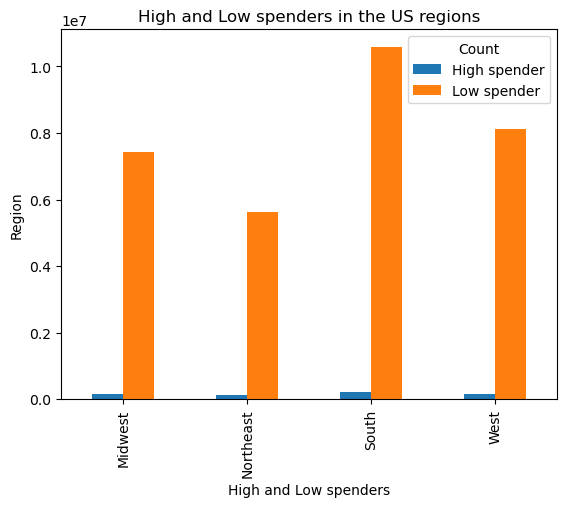

In [15]:
ct = pd.crosstab(df_vis["Region"], df_vis["spending_flag"],dropna=False)
ct.plot(kind="bar")

plt.title("High and Low spenders in the US regions")
plt.xlabel("High and Low spenders")
plt.ylabel("Region")
plt.legend(title="Count")

plt.savefig(r'C:\Users\PC\Desktop\CareerFoundry Data Analytics\08-2025 Instacart Basket Analysis\04 Analysis\Visualizations\high_and_low_spenders.png')
plt.show()

## Low activity customers 

In [16]:
# Create exclusion flag for low-activity customers (less than 5 orders total)
df_vis['exclusion_flag'] = df_vis['order_number'] < 5

In [17]:
# Check how many customers will be excluded
exclusion_counts = df_vis['exclusion_flag'].value_counts()
print(exclusion_counts)

exclusion_flag
False    24414877
True      7989982
Name: count, dtype: int64


In [18]:
# Filter only active customers (with 5 or more orders)
df_active_customers = df_vis[df_vis['exclusion_flag'] == False].copy()  
df_active_customers = df_active_customers.drop_duplicates()  

In [19]:
# Quick check
df_active_customers['user_id'].nunique()

162631

In [20]:
# Save the new df as a pkl file 
df_active_customers.to_pickle(os.path.join(path_data, '02 Data','Prepared Data', 'active_customers.pkl'))

## Profile segments

In [21]:
def profile_segment(row):
    if row['Number of Dependents'] > 1 and row['Income'] > 120000:
        return 'Family member, High Income'
    elif row['Number of Dependents'] > 1 and row['Income'] <= 120000:
        return 'Family member, Low/Med Income'
    elif row['Age'] >= 65 and row['Income'] > 120000:
        return 'Senior, High Income'
    elif row['Age'] >= 65 and row['Income'] <= 120000:
        return 'Senior, Low/Med Income'
    elif row['Number of Dependents'] <= 1 and row['Age'] < 30 and row['Income'] > 120000:
        return 'Young Adult, High Income'
    elif row['Number of Dependents'] <= 1 and row['Age'] < 30 and row['Income'] <= 120000:
        return 'Young Adult, Low/Med Income'
    else:
        return 'Other'

In [22]:
# Apply to df_active
df_active_customers['profile_segment'] = df_active_customers.apply(profile_segment, axis=1) 

In [23]:
# Quick check
df_active_customers['profile_segment'].value_counts(dropna=False)

profile_segment
Family member, Low/Med Income    8602905
Other                            6703719
Family member, High Income       3624863
Young Adult, Low/Med Income      2267290
Senior, Low/Med Income           1734706
Senior, High Income              1455147
Young Adult, High Income           26247
Name: count, dtype: int64

## Visualization of the profile segments

### Profile segments

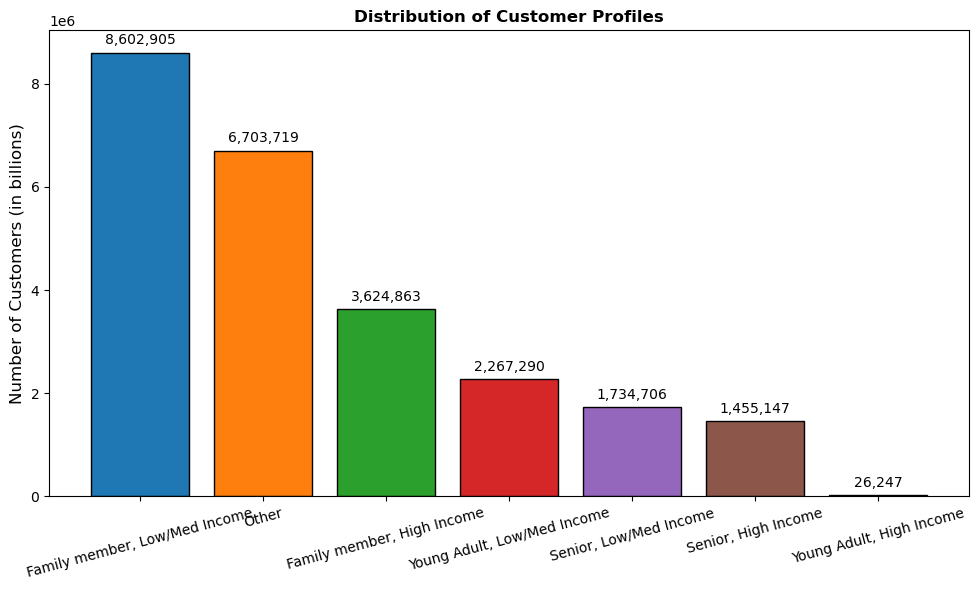

In [24]:
# Set color palette 
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']

# Prepare data
profile_counts = df_active_customers['profile_segment'].value_counts(dropna=False)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(profile_counts.index, profile_counts.values, color = colors, edgecolor ='black')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100000, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=10)

# Styling
plt.title('Distribution of Customer Profiles', fontsize = 12, weight = 'bold')
plt.ylabel('Number of Customers (in billions)', fontsize = 12)
plt.xticks(rotation = 15)
plt.tight_layout()

# Save figure
plt.savefig(r'C:\Users\PC\Desktop\CareerFoundry Data Analytics\08-2025 Instacart Basket Analysis\04 Analysis\Visualizations\profile_segments.png')
plt.show()

### Customer Profiles by Region

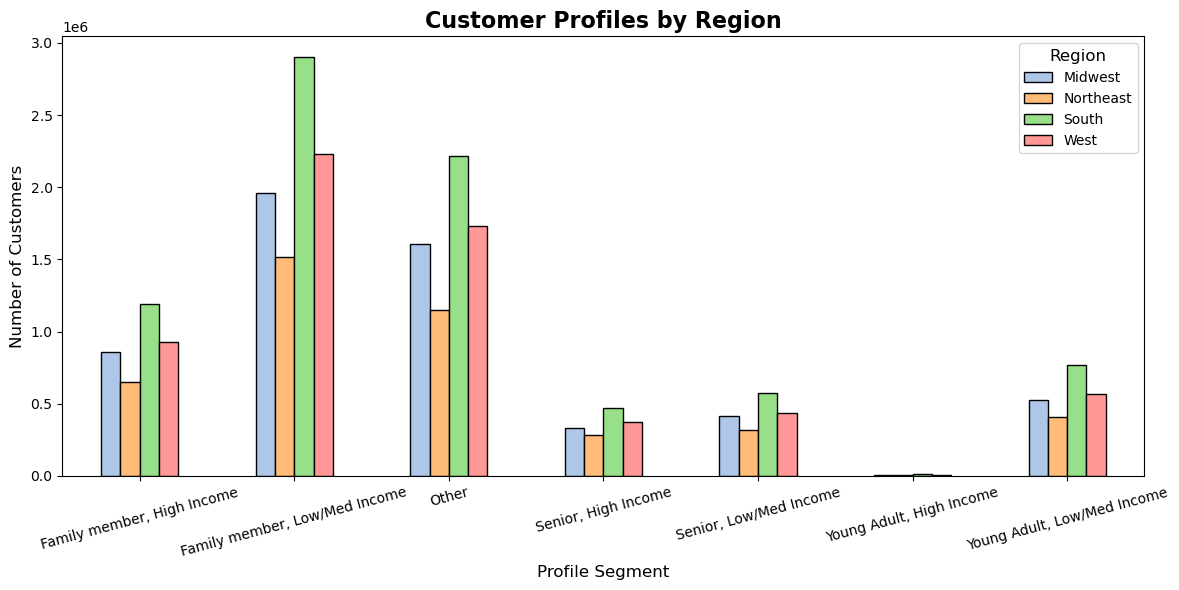

In [25]:
# Cross-tab for profile vs region
profile_region = pd.crosstab(df_active_customers['profile_segment'], df_active_customers['Region'])

# Plot with enhancements
colors = ['#AEC7E8', '#FFBB78', '#98DF8A', '#FF9896']
ax = profile_region.plot(kind = 'bar', figsize = (12, 6), color = colors, edgecolor = 'black')

# Title and axis labels
plt.title('Customer Profiles by Region', fontsize = 16, fontweight = 'bold')
plt.xlabel('Profile Segment', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xticks(rotation = 15, fontsize = 10)
plt.yticks(fontsize = 10)

# Legend formatting
plt.legend(title = 'Region', title_fontsize = 12, fontsize = 10, loc = 'upper right')

# Layout and save
plt.tight_layout()
plt.savefig(r'C:\Users\PC\Desktop\CareerFoundry Data Analytics\08-2025 Instacart Basket Analysis\04 Analysis\Visualizations\profiles_by_region.png')
plt.show()

## Distribution of customer profiles by region

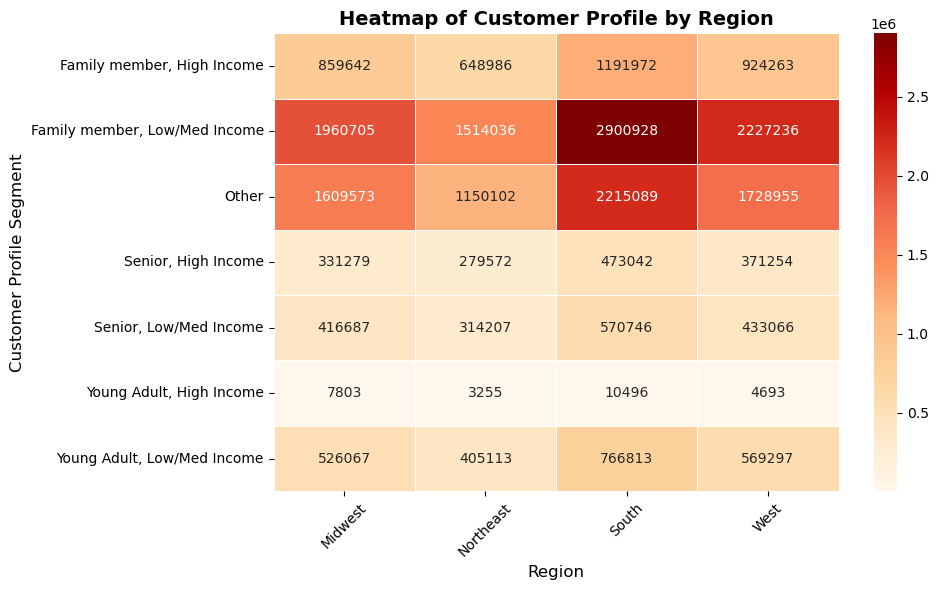

In [32]:
crosstab = pd.crosstab(df_active_customers['profile_segment'], df_active_customers['Region'])

plt.figure(figsize = (10, 6))
sns.heatmap(crosstab, annot = True, fmt = 'd', cmap = 'OrRd', linewidths = .5)

plt.title('Heatmap of Customer Profile by Region', fontsize = 14, fontweight = 'bold')
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Customer Profile Segment', fontsize = 12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

In [34]:
# Save the figure
plt.savefig(r'C:\Users\PC\Desktop\CareerFoundry Data Analytics\08-2025 Instacart Basket Analysis\04 Analysis\Visualizations\heatmap_region_prf.png')
plt.show()

<Figure size 640x480 with 0 Axes>